In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from os import listdir, makedirs
import os

import glob

from keras import layers
from keras import models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, regularizers

In [3]:
resolution = 150
batch_size = 128
learning_rate = [0.001,0.01,0.1]
epochs = [10,50,100]
history_set = {}

### CNN

In [20]:
def plotar(history,epochs,eta,p):
    print('Epochs: {} | Learning rate: {} | p: {}'.format(epochs,eta,p))
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend(loc='best')

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc='best')
    plt.show()

In [11]:
def create_model(train_gen, val_gen, learning_rate, num_epochs, batch_size):
    model = Sequential()
    model.add(layers.Conv2D(filters=100, kernel_size=(5,5), strides=(1,1), input_shape=(resolution,resolution,3)))
    model.add(layers.Conv2D(filters=100, kernel_size=(5,5)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(units= 64, activation='relu'))
    model.add(layers.Dense(units=11, activation='relu'))
    
    model.summary()
    
    n_train = train_gen.n
    n_valid = val_gen.n
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adamax(lr=learning_rate), metrics=['acc'])
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=n_train//batch_size,
        epochs=num_epochs,
        validation_data=val_generator,
        validation_steps=n_valid//batch_size
    )
    
    history_set[(num_epochs,learning_rate)] = history

### Item c)
A técnica que pode ser utilizada é a de Data Augmentation, onde...

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

In [8]:
train_generator = train_datagen.flow_from_directory(
        "../input/top11/top11/",
        target_size=(resolution, resolution),
        batch_size=16,
        class_mode='categorical', subset="training")

val_generator = val_datagen.flow_from_directory(
        "../input/top11/top11/",
        target_size=(resolution, resolution),
        batch_size=16,
        class_mode='categorical', subset="validation")

Found 12963 images belonging to 11 classes.
Found 2280 images belonging to 11 classes.


In [9]:
eta = 0.001
epo = 50

In [12]:
print('Learning rate: {} and Num epochs: {}'.format(eta,epo))
create_model(train_generator,val_generator,eta,epo,batch_size)

Learning rate: 0.001 and Num epochs: 50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 146, 146, 100)     7600      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 142, 142, 100)     250100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 71, 71, 100)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 504100)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32262464  
_________________________________________________________________
dense_4 (Dense)              (None, 11)                715       
Total params: 32,520,879
Trainable params: 32,520,879
Non-trainable params: 0
________________________

Epochs: 50 | Learning rate: 0.001 | p: -1.0


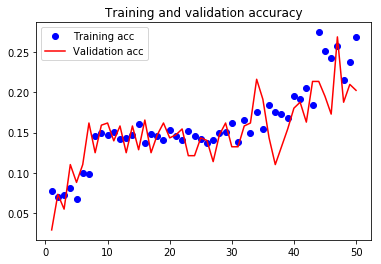

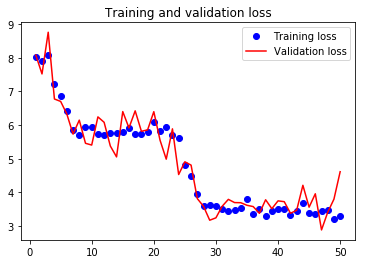

In [21]:
plotar(history_set[(50, 0.001)],50,0.001,-1.0)

### Item d)

In [14]:
p = [0.1,0.3,0.5]
history_p = {}

In [16]:
top10 = {'homer_simpson': 0,
'ned_flanders': 1,
'moe_szyslak': 2,
'lisa_simpson': 3,
'bart_simpson': 4,
'marge_simpson': 5,
'krusty_the_clown': 6,
'principal_skinner': 7,
'charles_montgomery_burns': 8,
'milhouse_van_houten': 9}

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = train_datagen.flow_from_directory(
        "../input/top11/top11/",
        classes = top10,
        target_size=(resolution, resolution),
        batch_size=16,
        class_mode='categorical', subset="training")

val_generator = val_datagen.flow_from_directory(
        "../input/top11/top11/",
        classes = top10,
        target_size=(resolution, resolution),
        batch_size=16,
        class_mode='categorical', subset="validation")

Found 11745 images belonging to 10 classes.
Found 2066 images belonging to 10 classes.


In [15]:
def create_model(train_gen, val_gen, learning_rate, num_epochs, batch_size, p):
    model = Sequential()
    model.add(layers.Conv2D(filters=100, kernel_size=(5,5), strides=(1,1), input_shape=(resolution,resolution,3)))
    model.add(layers.Conv2D(filters=100, kernel_size=(5,5)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(Dropout(p))
    model.add(layers.Dense(units= 64, activation='relu'))
    model.add(layers.Dense(units=10, activation='relu'))
    
    model.summary()
    
    n_train = train_gen.n
    n_valid = val_gen.n
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adamax(lr=learning_rate), metrics=['acc'])
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=n_train//batch_size,
        epochs=num_epochs,
        validation_data=val_generator,
        validation_steps=n_valid//batch_size
    )
    
    history_set[(num_epochs,learning_rate,p)] = history

In [18]:
for i in p:
    print('Learning rate: {}, num epochs: {} and p: {}'.format(eta,epo,i))
    create_model(train_generator,val_generator,eta,epo,batch_size,i)

Learning rate: 0.001, num epochs: 50 and p: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 146, 146, 100)     7600      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 142, 142, 100)     250100    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 71, 71, 100)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 504100)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 504100)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32262464  
_________________________________________________________________
dense_6 (Dense)             

Epoch 1/50
91/91 [==============================] - 22s 245ms/step - loss: 7.2384 - acc: 0.1690 - val_loss: 6.8487 - val_acc: 0.1992
Epoch 2/50
91/91 [==============================] - 19s 211ms/step - loss: 7.0870 - acc: 0.1573 - val_loss: 7.8615 - val_acc: 0.1562
Epoch 3/50
91/91 [==============================] - 19s 212ms/step - loss: 7.2246 - acc: 0.1669 - val_loss: 7.1184 - val_acc: 0.1797
Epoch 4/50
91/91 [==============================] - 19s 212ms/step - loss: 7.1481 - acc: 0.1600 - val_loss: 6.4040 - val_acc: 0.1914
Epoch 5/50
91/91 [==============================] - 19s 212ms/step - loss: 6.6463 - acc: 0.1971 - val_loss: 6.0581 - val_acc: 0.1133
Epoch 6/50
91/91 [==============================] - 19s 213ms/step - loss: 3.9169 - acc: 0.0996 - val_loss: 3.7525 - val_acc: 0.1172
Epoch 7/50
91/91 [==============================] - 19s 211ms/step - loss: 3.5030 - acc: 0.1216 - val_loss: 3.5375 - val_acc: 0.1488
Epoch 8/50
91/91 [==============================] - 19s 213ms/step - 

91/91 [==============================] - 19s 212ms/step - loss: 8.5496 - acc: 0.1552 - val_loss: 8.8374 - val_acc: 0.1523
Epoch 3/50
91/91 [==============================] - 19s 211ms/step - loss: 8.0431 - acc: 0.1696 - val_loss: 8.3340 - val_acc: 0.1875
Epoch 4/50
91/91 [==============================] - 19s 213ms/step - loss: 4.6300 - acc: 0.1628 - val_loss: 5.2291 - val_acc: 0.1602
Epoch 5/50
91/91 [==============================] - 19s 211ms/step - loss: 4.6125 - acc: 0.1662 - val_loss: 3.5321 - val_acc: 0.1446
Epoch 6/50
91/91 [==============================] - 19s 213ms/step - loss: 3.2618 - acc: 0.1456 - val_loss: 3.3256 - val_acc: 0.1836
Epoch 7/50
91/91 [==============================] - 19s 214ms/step - loss: 3.2803 - acc: 0.1738 - val_loss: 3.3980 - val_acc: 0.1641
Epoch 8/50
91/91 [==============================] - 19s 214ms/step - loss: 3.3610 - acc: 0.1607 - val_loss: 3.5897 - val_acc: 0.1719
Epoch 9/50
91/91 [==============================] - 19s 214ms/step - loss: 3.389

In [ ]:
for i in p:
    plotar(history_set[(50, 0.001,i)],50,0.001,i)

Epochs: 50 | Learning rate: 0.001 | p: 0.1
